# Консольные игры и условия их успеха.

In [ ]:
Загрузка библиотек.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from scipy import stats as st

Функция для обзора и отображания информации о данных

In [4]:
def table_info (df):
    display(df.sample(10)) #10 случайных строк
    print('---------------')
    df.info() #инфо по столбцам
    print('---------------')
    print('Дубликатов:', df.duplicated().sum()) #кол-во дубликатов
    print('---------------')
    print('Пропущенных значений', df.isna().sum()) #кол-во пропущенных значений

## Обзор данных <a id="overview"></a>

In [5]:
data = pd.read_csv('games.csv')
table_info(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
13895,Hyperdimension Neptunia Victory II,PS4,2015.0,Role-Playing,0.00,0.00,0.04,0.00,NaN,NaN,NaN
1626,Vigilante 8,PS,1998.0,Racing,0.68,0.47,0.00,0.08,NaN,NaN,NaN
6244,Patapon 3,PSP,2011.0,Misc,0.05,0.03,0.17,0.02,74.0,7.2,E
5912,Finding Nemo: The Continuing Adventures,GBA,2004.0,Action,0.21,0.08,0.00,0.01,NaN,tbd,E
8360,Beat Down: Fists of Vengeance,PS2,2005.0,Action,0.04,0.03,0.09,0.01,48.0,8.1,M
5967,Up,X360,2009.0,Action,0.20,0.07,0.00,0.03,61.0,6.8,E10+
12535,Serious Sam II,XB,2005.0,Shooter,0.05,0.01,0.00,0.00,72.0,6.7,M
59,Super Mario 64,DS,2004.0,Platform,5.01,3.07,1.25,0.97,NaN,NaN,NaN
178,Donkey Kong 64,N64,1999.0,Platform,3.33,0.79,1.09,0.06,NaN,NaN,NaN
946,Phineas and Ferb,DS,2009.0,Action,1.32,0.37,0.00,0.15,80.0,4.5,E


---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
---------------
Дубликатов: 0
---------------
Пропущенных значений Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales      

Неявных дубликатов в столбце `Platform` нет.

In [4]:
Counter(data['Platform'])

Counter({'Wii': 1320,
         'NES': 98,
         'GB': 98,
         'DS': 2151,
         'X360': 1262,
         'PS3': 1331,
         'PS2': 2161,
         'SNES': 239,
         'GBA': 822,
         'PS4': 392,
         '3DS': 520,
         'N64': 319,
         'PS': 1197,
         'XB': 824,
         'PC': 974,
         '2600': 133,
         'PSP': 1209,
         'XOne': 247,
         'WiiU': 147,
         'GC': 556,
         'GEN': 29,
         'DC': 52,
         'PSV': 430,
         'SAT': 173,
         'SCD': 6,
         'WS': 6,
         'NG': 12,
         'TG16': 2,
         '3DO': 3,
         'GG': 1,
         'PCFX': 1})

Выводы:
* привести названия всех колонок к единому стилю;
* в столбце с оценкой пользователей - tbd - To Be Determined - будет определенно, т.е. оценка неизвестна - заменить на NaN;
* много пропущенных значений в оценках от критиков и пользователей и в возрастной отметке. Заменять пропуски не будем, это может исказить результаты. Думаю, что пропуски в оценках есть у игр с низким уровнем продаж.

## Подготовка данных  <a class="anchor" id="first-bullet"></a>

Изменим названия столбцов.

In [6]:
print(data.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


In [7]:
data = (
    data.rename(columns={'Name':'name', 'Platform':'platform', 'Year_of_Release':'year_of_release',
                             'Genre':'genre', 'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales',
                             'Other_sales':'other_sales', 'Critic_Score':'critic_score', 'User_Score':'user_score',
                             'Rating':'rating'})
)
print(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


Добавим информацию по суммарным продажам игр.

In [10]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

tbd в оценках пользователей заменим на NaN.

In [11]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'] = data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
total_sales        16715 non-null float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


Заменим NaN в столбце с рейтингом на Unknown.

In [12]:
data['rating'] = data['rating'].fillna('Unknown')

## Исследовательский анализ данных

### Исследование платформ

Визуальзация количества общих продаж по годам. Спад начался после кризиса в 2008 году и наверняка связан со снижением покупальской способности населения. Возможно с развитием игровой индустрии в другом направлении. Можно выделить 3 самых успешных года для продаж - 2007, 2008, 2009. До 2008 идет рост продаж, после 2009 года наблюдается спад.

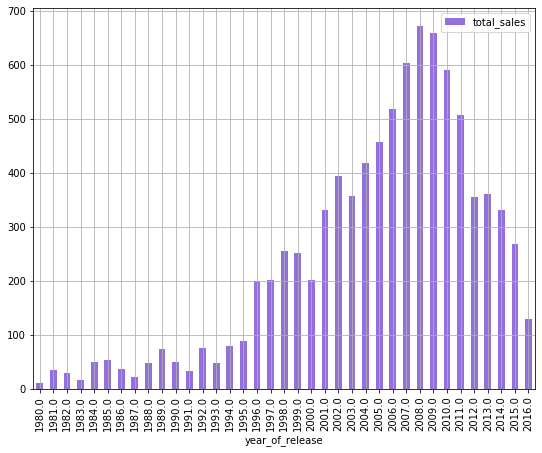

In [13]:
(
    data.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .reset_index()
    .plot(x='year_of_release', y='total_sales', kind='bar', figsize=(9,7), color='mediumpurple',grid=True)
);

Продолжительность жизни платформ. Лидер про долголетию - PC - 26 лет. Минимальный срок 1 год у платформ GC, PCFX, TG16. Средняя продолжительность существования платформ - 7 лет.

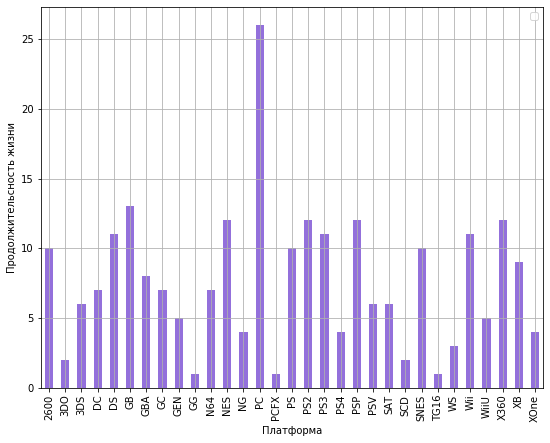

In [14]:

(
    data.pivot_table(index=('platform','year_of_release'),values='total_sales', aggfunc='sum')
    .reset_index()
    .pivot_table(index='platform', values='year_of_release', aggfunc='count')
    .plot(kind='bar', figsize=(9,7), color='mediumpurple', grid=True)
)
plt.xlabel('Платформа')
plt.ylabel('Продолжительсность жизни')
plt.legend('');

In [15]:
(
    data.pivot_table(index=('platform','year_of_release'),values='total_sales', aggfunc='sum')
    .reset_index()
    .pivot_table(index='platform', values='year_of_release', aggfunc='count')
    .reset_index()
).describe()

,year_of_release
count,31.000000
mean,7.677419
std,5.081910
min,1.000000
25%,4.000000
50%,7.000000
75%,11.000000
max,26.000000


Cумарные продажи платформ за 26 лет.

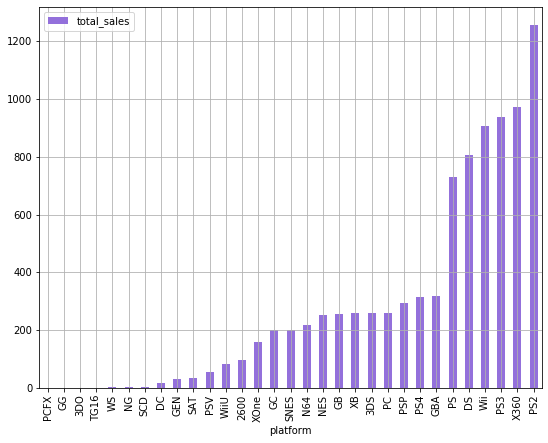

In [16]:
(
    data.pivot_table(index=('platform'),values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales')
    .plot(kind='bar',figsize=(9,7), color='mediumpurple', grid=True)
);

Продажи платформ по годам.

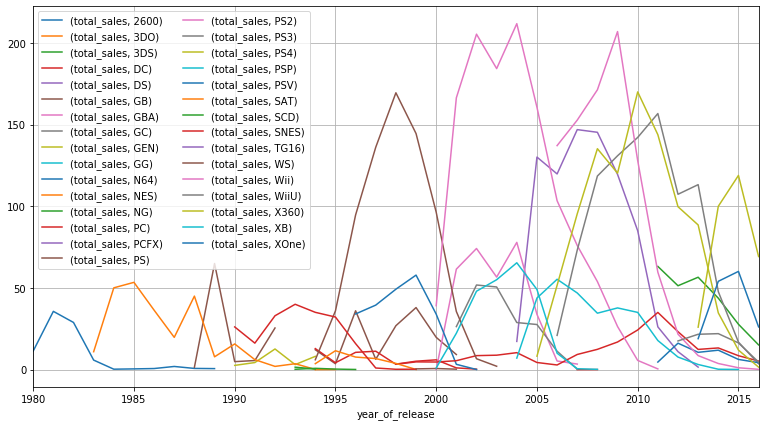

In [17]:
(
    data.pivot_table(index=('year_of_release', 'platform'),values='total_sales', aggfunc='sum')
    .unstack('platform') 
    .plot(kind='line', figsize=(13,7), grid=True)
)
plt.legend(ncol=2);

Продажи платформ по годам.

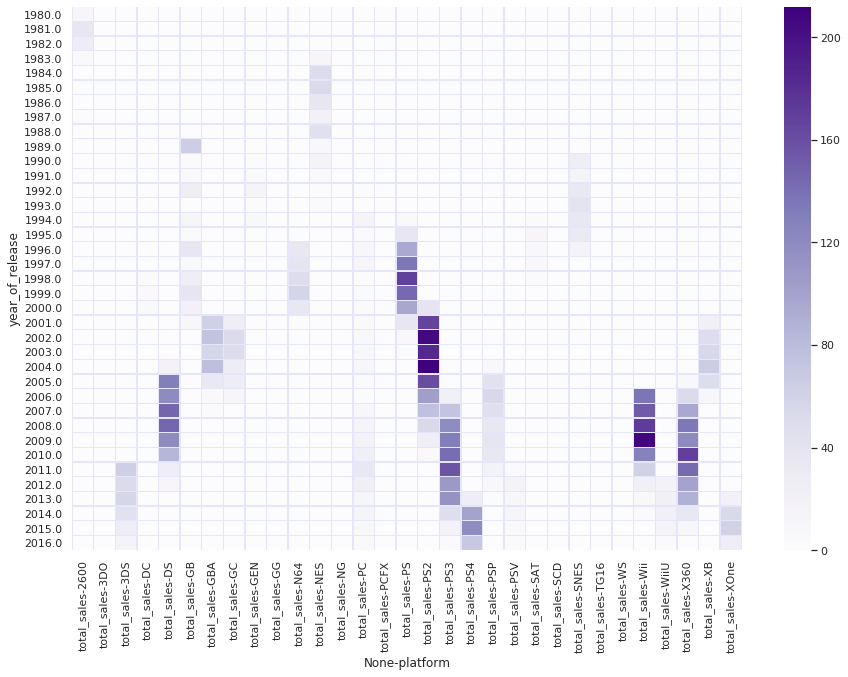

In [18]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(
    data.pivot_table(index=('year_of_release', 'platform'),values='total_sales', aggfunc='sum')
    .unstack('platform')
    .fillna(0), cmap='Purples', linewidths=0.3, linecolor='lavender'
);

Глядя на график суммарных продаж можно выделить лидеров рынка в порядке убывания: PS2, X360, PS3, Wii, DS.

### 5 лидеров

Продажи 5 лидеров по годам.

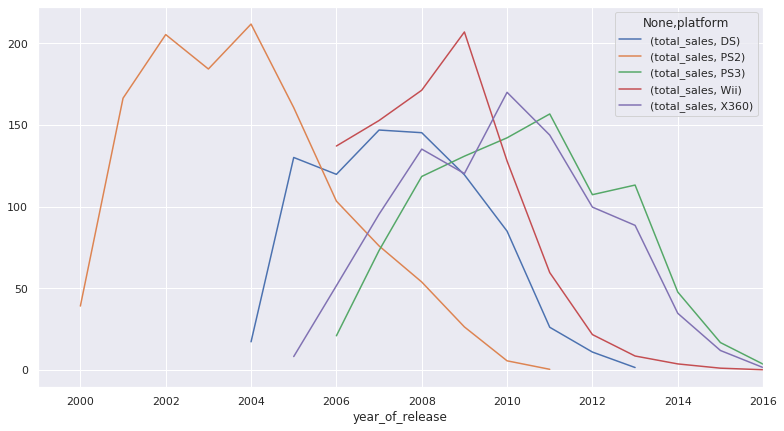

In [19]:

(   
    data.query('"PS2" in platform or "X360" in platform or "PS3" in platform or "Wii" in platform or "DS" in platform')
    .pivot_table(index=('year_of_release', 'platform'),values='total_sales', aggfunc='sum')
    .unstack('platform') 
    .sort_values(by='year_of_release')
    .plot(kind='line',xlim=1999, figsize=(13,7), grid=True)
);

Продажи 5 лидеров по годам.

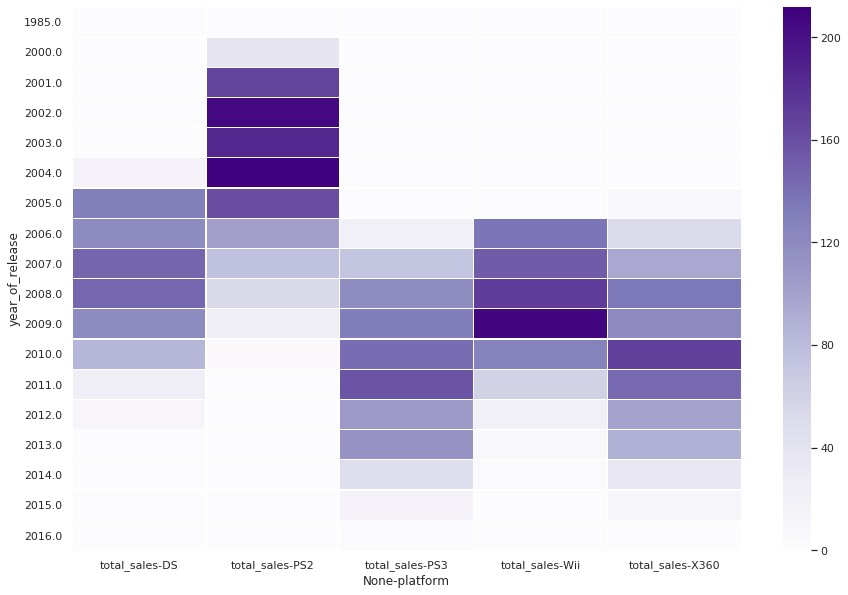

In [20]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(   
    data.query('"PS2" in platform or "X360" in platform or "PS3" in platform or "Wii" in platform or "DS" in platform')
    .pivot_table(index=('year_of_release', 'platform'),values='total_sales', aggfunc='sum')
    .unstack('platform') 
    .fillna(0), cmap='Purples', linewidths=0.3, linecolor='white'
);


Благодаря графика можно заметить, что у платформ-лидров подъем и спад были в одни временные периоды. Рост продаж начался в период 2004 - 2008, а после 2011 идет спад у всех. Для анализа был выбран период 2014-2016 год, т.к. данный период покажет актуальные предпочтения пользователей в платформах и жанрах для прогноза на 2017 год..

### 2014 - 2016 год

Выделим данные для 2014-2016 в отдельную таблицу.

In [21]:
data_period = data.query('"2014" in year_of_release | "2015" in year_of_release | "2016" in year_of_release')

Проджи платформ в 2014-2016 году.

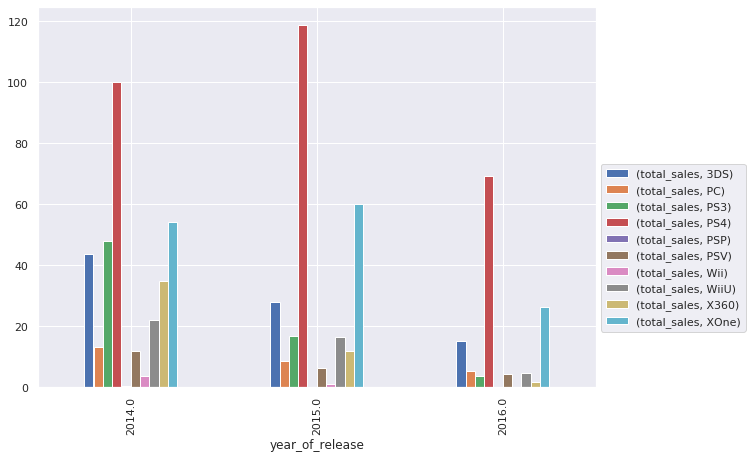

In [22]:
(
    data_period.pivot_table(index=('platform','year_of_release'),values='total_sales', aggfunc='sum')
    .unstack('platform')
    .plot(kind='bar', figsize=(10,7), grid=True)
)
plt.legend(bbox_to_anchor=(1, 0.6));

Динамика на 2014-2016.

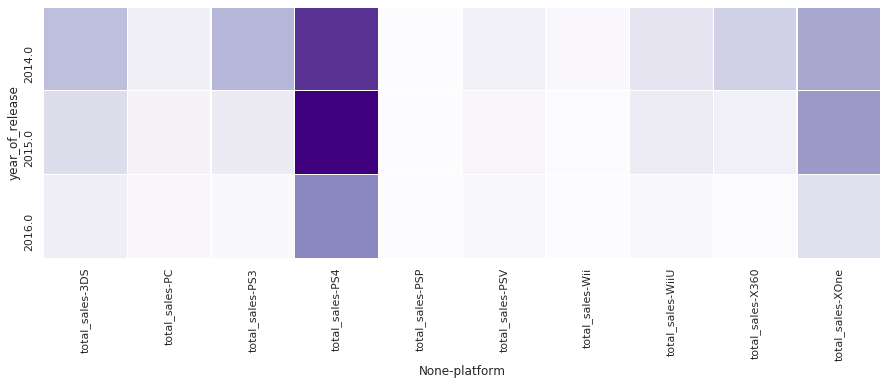

In [23]:
sns.heatmap(
    data_period.pivot_table(index=('platform','year_of_release'),values='total_sales', aggfunc='sum')
    .unstack('platform')
    .fillna(0), cmap='Purples', linewidths=0.3, linecolor='white', square=True, cbar=False
);
sns.set(rc = {'figure.figsize':(10,10)});

Доли продаж платформ в 2016.

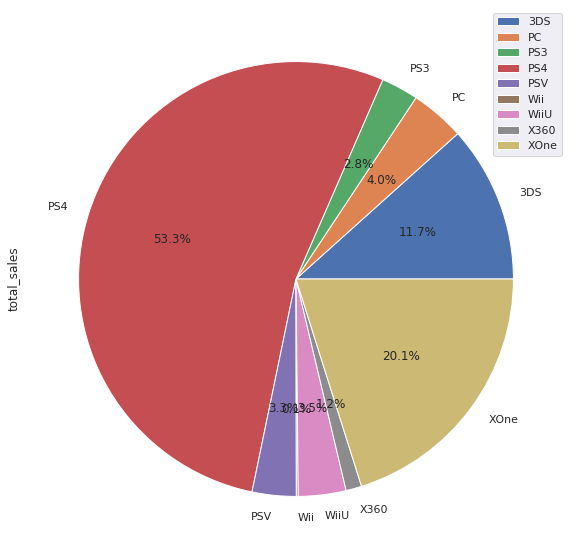

In [24]:
(
    data.query('"2016" in year_of_release')
    .pivot_table(index=('platform'),values='total_sales', aggfunc='sum')
    .plot(kind='pie', x='platform', y='total_sales', autopct='%1.1f%%') 
);

Графики за 2014-2016 год говорят нам о том, что практически у всех платформ наблюдается спад в данный период. Самое явное снижение продаж у PS4, XOne. В период 2014-2015 PS4 и XOne росли. Лидеры в 2016 году (по уменьшенью популярности): PS4, XOne, 3DS, PC. Данные платформы можно назвать самыми перспективными на 2017 год.C. 

### Зависимость оценок и продаж

Продажи PS4 2014-2016 год.

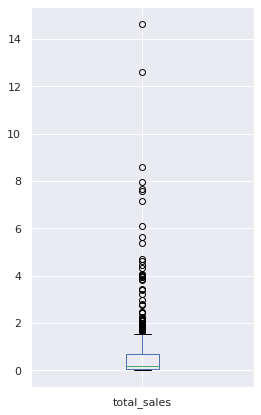

In [25]:
(
    data_period.query('"PS4" in platform').pivot_table(index=('name'),values='total_sales', aggfunc='sum')
    .boxplot(figsize=(4,7))
);

Продажи XOne 2014-2016 год.

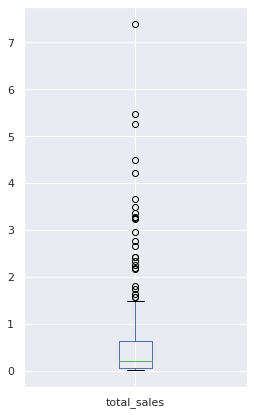

In [26]:
(
    data_period.query('"XOne" in platform').pivot_table(index=('name'),values='total_sales', aggfunc='sum')
    .boxplot(figsize=(4,7))
);

Продажи 3DS 2014-2016 год.

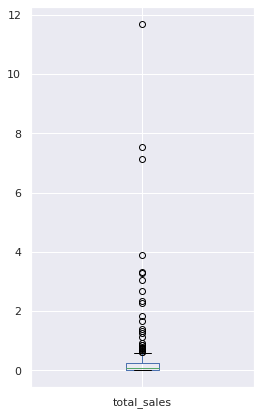

In [27]:
(
    data_period.query('"3DS" in platform').pivot_table(index=('name'),values='total_sales', aggfunc='sum')
    .boxplot(figsize=(4,7))
);

Продажи PC 2014-2016.

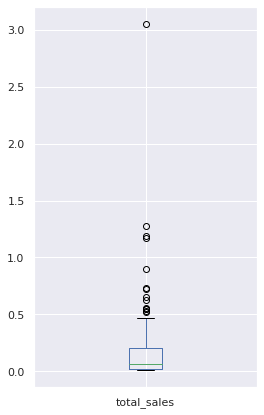

In [28]:
(
    data_period.query('"PC" in platform').pivot_table(index=('name'),values='total_sales', aggfunc='sum')
    .boxplot(figsize=(4,7))
);

Для каждой из платформ в данный период характерно большое количество бестселлеров с заметно большими суммами продаж. Для PS4 количество таких продуктов больше чем для остальных платформ.

In [29]:
import warnings
warnings.simplefilter("ignore")

In [30]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

Взаимосвязь оценок и продаж на всех платфомах в 2014-2016. Зависимости продаж от отзывов пользователей практически нет. На продажи по всем платформам немного влияют отзывы критиков. Возможно во время покупок пользователи обращают внимание на рекламные компании, свои потребности, но не следуют советам критиков и других покупателей.

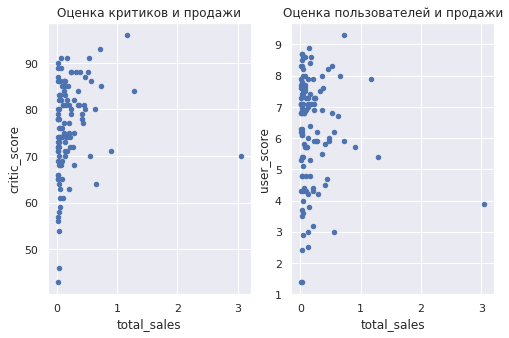

In [31]:
fig, axs = plt.subplots(1,2, figsize=(8,5))

(
    data_period.query('"PC" in platform')
    .plot(kind='scatter', x='total_sales', y='critic_score', ax=axs[0])
    .set_title('Оценка критиков и продажи')
)
(
    data_period.query('"PC" in platform')
    .plot(kind='scatter', x='total_sales', y='user_score', ax=axs[1])
    .set_title('Оценка пользователей и продажи')
);

In [32]:
data_period.query('"PC" in platform')[['user_score','total_sales','critic_score']].corr()

,user_score,total_sales,critic_score
user_score,1.000000,-0.071597,0.466099
total_sales,-0.071597,1.000000,0.174634
critic_score,0.466099,0.174634,1.000000


Взаимосвязь оценок и продаж на всех платфомах в 2014-2016. Зависимости продаж от отзывов пользователей практически нет. На продажи по всем платформам немного влияют отзывы критиков. Возможно во время покупок пользователи обращают внимание на рекламные компании, свои потребности, но не следуют советам критиков и других покупателей.

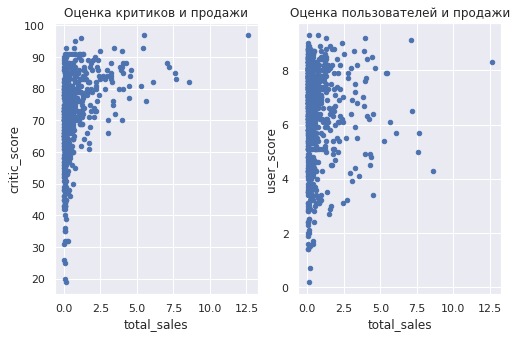

In [33]:
fig, axs = plt.subplots(1,2, figsize=(8,5))

(
    data_period.plot(kind='scatter', x='total_sales', y='critic_score', ax=axs[0])
    .set_title('Оценка критиков и продажи')
)
(
    data_period.plot(kind='scatter', x='total_sales', y='user_score', ax=axs[1])
    .set_title('Оценка пользователей и продажи')
);

In [34]:
data_period[['user_score','total_sales','critic_score']].corr()

,user_score,total_sales,critic_score
user_score,1.00000,-0.013070,0.504460
total_sales,-0.01307,1.000000,0.328105
critic_score,0.50446,0.328105,1.000000


### Игры и жанры

Графики количества игр в жанрах и популярность жанров. Больше всего игр созданно в жанре Action. На втором и третьем месте по количеству игр: Role-Playing, Adventure. Меньше всего игр в жанре Puzzle, Strategy, Platform. 
По продажам на первом месте жанры: Action, Shooter, Sports, Role-Playing. 
Самые не популярные: Puzzle, Strategy, Simulation.

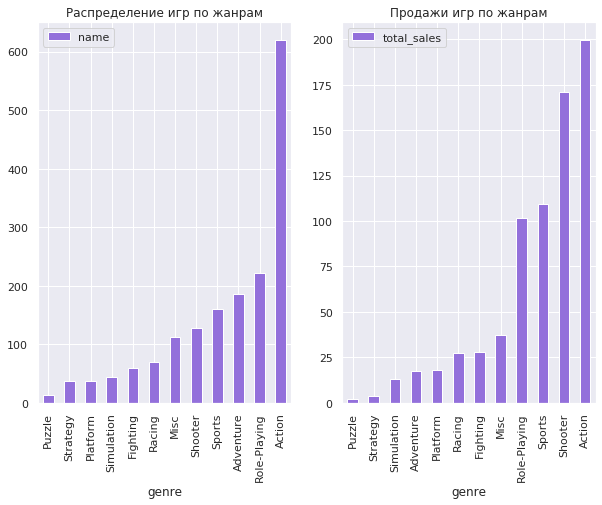

In [35]:
fig, axs = plt.subplots(1,2, figsize=(10,7)) 
(
    data_period.pivot_table(index=('genre'),values='name', aggfunc='count')
    .sort_values(by='name')
    .plot(kind='bar', color='mediumpurple', grid=True, ax=axs[0])
    .set_title('Распределение игр по жанрам')
);

(
    data_period.pivot_table(index=('genre'),values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales')
    .plot(kind='bar', color='mediumpurple', grid=True, ax=axs[1])
    .set_title('Продажи игр по жанрам')
);

## Портрет пользователя 

Популярные платформы в регионах
5 платформ лидеров североамериканского региона: 
- "PS4";
- "XOne";
- "X360";
- "3DS";
- "PS3"

5 платформ лидеров Европы: 
- "PS4";
- "XOne";
- "PS3";
- "PC";
- "3DS".

5 платформ лидеров Японии: 
- "3DS" ;
- "PS4" ;
- "PSV" ;
- "PS3" ;
-  "WiiU".
В Северной Америке "PS4" и "XOne" лидеры.
В Европе  "PS4" и "XOne" являются самыми популярными.

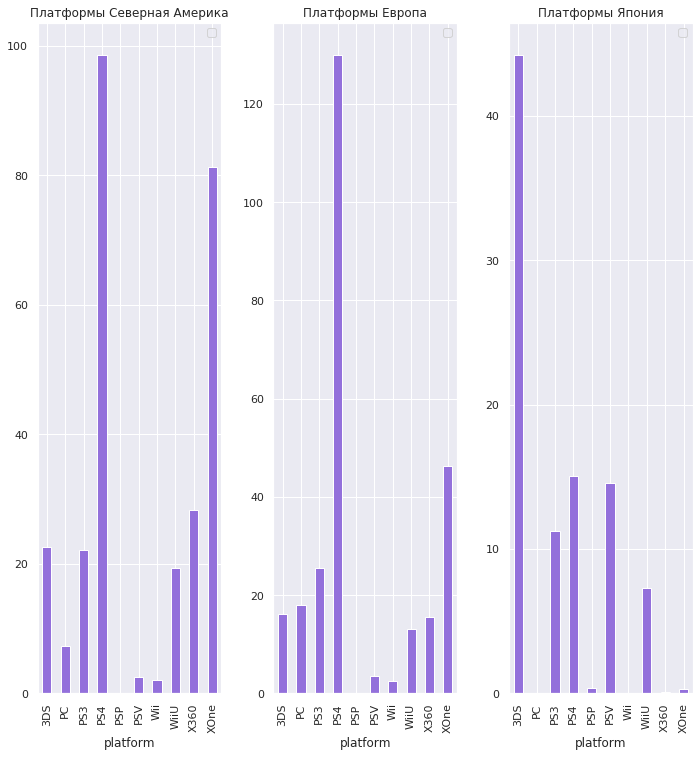

In [36]:
fig, axs = plt.subplots(1,3) 
plt.tight_layout ()
(
    data_period.pivot_table(index=('platform'),values='na_sales', aggfunc='sum')
    .plot(kind='bar', color='mediumpurple', ax=axs[0])
    .set_title('Платформы Северная Америка')
)

(
    data_period.pivot_table(index=('platform'),values='eu_sales', aggfunc='sum')
    .plot(kind='bar', color='mediumpurple', ax=axs[1])
    .set_title('Платформы Европа')
)
( 
    data_period.pivot_table(index=('platform'),values='jp_sales', aggfunc='sum')
    .plot(kind='bar', color='mediumpurple', ax=axs[2])
    .set_title('Платформы Япония') 
)
axs[0].legend('')
axs[1].legend('')
axs[2].legend('');

Популярные жанры в регионах.
Самые популярные жанры Северной Америки:
- Shooter; 
- Action;
- Sports;
- Role-Playing;
- Misc.

Самые популярные жанры Европы:
- Action;
- Shooter; 
- Sports; 
- Role-Playing;
- Racing.

Самые популярные жанры Японии:
- Role-Playing;
- Action;
- Faghting;
- Misc; 
- Shooter.

Жанр Action в каждом регионе входит в тройку лидеров. В Европе и Северной америке 4-ка жанров лидеров выглядит похоже, в неё входят жанры: Action, Shooter, Sports, Role-Playing. 
В Японии на первом месте по популярности у Role-Playing. Action на 2 месте. Faghting замыкает тройку. Shooter так же присутвует и находится на 5-м месте.

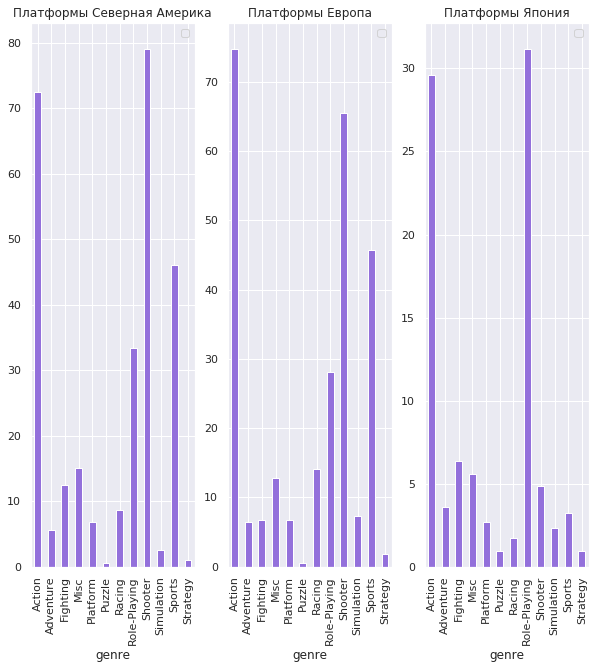

In [37]:
fig, axs = plt.subplots(1,3) 
(
    data_period.pivot_table(index=('genre'),values='na_sales', aggfunc='sum')
    .plot(kind='bar', color='mediumpurple', ax=axs[0]) 
    .set_title('Платформы Северная Америка')
)

(
    data_period.pivot_table(index=('genre'),values='eu_sales', aggfunc='sum')
    .plot(kind='bar', color='mediumpurple', ax=axs[1])
    .set_title('Платформы Европа')
)
( 
    data_period.pivot_table(index=('genre'),values='jp_sales', aggfunc='sum')
    .plot(kind='bar',color='mediumpurple', ax=axs[2])
    .set_title('Платформы Япония') 
)
axs[0].legend('')
axs[1].legend('')
axs[2].legend('');

Рейтинг и продажи.
 Наиболее продаваемые игры в Америке и Европе игры для возрастной категории 17+, те что подходят для всех возрастных групп и игры для подростков (13-19 лет).
    В Японии самые популярные это игры с не определенным рейтингом, для подростков (13-19 лет), игры которые подходят всем возрастным группам и с категорией 17+.

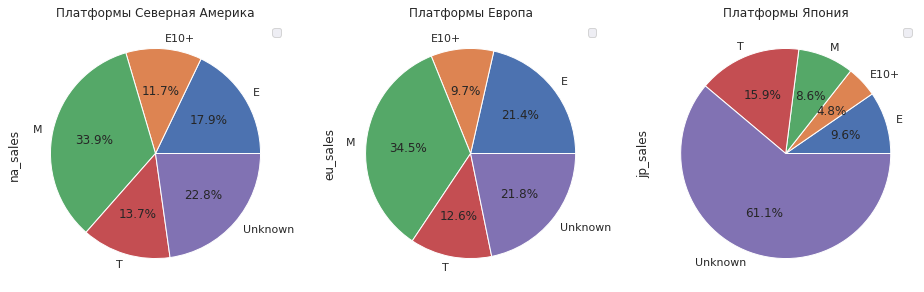

In [38]:
fig, axs = plt.subplots(1,3, figsize=(16,16)) 
(
    data_period.pivot_table(index=('rating'),values='na_sales', aggfunc='sum')
    .plot(kind='pie', x='rating', y='na_sales', ax=axs[0], autopct='%1.1f%%') 
    .set_title('Платформы Северная Америка')
)

(
    data_period.pivot_table(index=('rating'),values='eu_sales', aggfunc='sum')
    .plot(kind='pie', x='rating', y='eu_sales', ax=axs[1], autopct='%1.1f%%')
    .set_title('Платформы Европа')
)
( 
    data_period.pivot_table(index=('rating'),values='jp_sales', aggfunc='sum')
    .plot(kind='pie', x='rating', y='jp_sales', ax=axs[2], autopct='%1.1f%%')
    .set_title('Платформы Япония') 
)
axs[0].legend('')
axs[1].legend('')
axs[2].legend('');

## Проверка гипотез

Дисперсия двух выборок PC и XOne различна.

In [39]:
pc = data_period.query('"PC" in platform')['user_score']
print('PC', np.var(pc, ddof=1))
xone = data_period.query('"XOne" in platform')['user_score']
print('XOne', np.var(xone, ddof=1))

PC 2.901154315133451
XOne 1.8910066518847009


Дисперсия двух выборок Action и Sports различна.

In [40]:
action = data_period.query('"Action" in genre')['user_score']
print('Action', np.var(action, ddof=1))
sports = data_period.query('"Sports" in genre')['user_score']
print('Sports', np.var(sports, ddof=1))

Action 1.8984766584766581
Sports 3.4469791276090485


Нулевая гипотеза: средние пользовательские рейтинги платформ PC и XOne равны.
Альтернативная гипотеза: средние пользовательские рейтинги платформ PC и XOne не равны.

In [41]:
results = st.ttest_ind(
data_period.query('"PC" in platform')['user_score'],
data_period.query('"XOne" in platform')['user_score'],
equal_var = False, nan_policy='omit')
alpha = .05

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу") 

Не отвергаем нулевую гипотезу


Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Shooter равны.
Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports не равны.

In [42]:
results = st.ttest_ind(
data_period.query('"Action" in genre')['user_score'],
data_period.query('"Sports" in genre')['user_score'],
equal_var = False, nan_policy='omit')
alpha = .05

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу") 

Отвергаем нулевую гипотезу


В первом случае у нас не получилрсь опровергнуть гипотезу о равных средних пользовательских рейтингах платформ XOne и PC.
Во втором случае мы смогли отвергнуть гипотезу о равных средних пользовательских рейтингах жанров Action и Shooter.

## Вывод

    Самые успешние года для видео игр были 2007, 2008, 2009. Это был пик продаж и процветание различных платформ. После 2009 пошла тененция на общий спад и исчезновение многих платформ. Средний период существования платформ - 7 лет. Самыми большими продажами за 26 лет обладают следующие платформы: PS2, X360, PS3, Wii, DS. Но даже у них после 2011 года продажи пошли на убыл, некоторые платформы исчезли. Для анализа мною был выбран период 2014-2016 год т.к. данный период покажет актуальные предпочтения пользователей в платформах и жанрах, а так же динамику развития платформ.
    Графики за 2014-2016 год говорят нам о том, что у всех платформ спад в данный период. Самое явное снижение продаж наблюдается у PS4, XOne.  В период 2014-2015 PS4 и XOne росли. Лидерами по продажам в 2016 году (по уменьшенью популярности) являются: PS4, XOne, 3DS, PC.
    Зависимости продаж от отзывов пользователей практически нет. На продажи по всем платформам немного влияют отзывы критиков.
    В 2014-2016 годах больше всего игр было созданно в жанре Action. На втором и третьем месте по количеству игр: Role-Playing, Adventure. Меньше всего написано игр в жанре Puzzle, Strategy, Platform. 
    По продажам на первом месте жанры: Action, Shooter, Sports, Role-Playing. 
    Самые не популярные: Puzzle, Strategy, Simulation.
    В регеоне Северной Америке лидирующее место занимают платформы "PS4" и "XOne". В Европе за тот же период "PS4" и "XOne" нахоятся в лидерах. В Японии больше всего продаж у "3DS", "PS4", "PSV". 
     Жанр Action в каждом регионе входит в тройку лидеров. В Европе и Северной америке 4-ка жанров лидеров выглядит похоже, в неё входят жанры: Action, Shooter, Sports, Role-Playing. 
    В Японии на первом месте по популярности у Role-Playing. Action на 2 месте. Faghting замыкает тройку. Shooter так же присутвует и находится на 5-м месте.
    Наиболее продаваемые игры в Америке и Европе игры для возрастной категории 17+, те что подходят для всех возрастных групп и игры для подростков (13-19 лет).
    В Японии самые популярные это игры с не определенным рейтингом, для подростков (13-19 лет), игры которые подходят всем возрастным группам и с категорией 17+.
    Мною были проверены 2 гипотезы о равенстве средних пользовательских рейтингов двух популярных платформ XOne и PC между собой и равенстве средних пользовательских рейтингов жанров Action и Sports. Т-тест показал, что гипотезу о равенстве средних пользовательских рейтингов для XOne и PC отвергнуть мы не можем, а вторую гипотезу мы может отвегрнуть. 
    
    
    